In [3]:
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Path to celeb dataset
PATH = '/workspace/AI/OpenSource/celebrities/'

# Get face attributes
attributes = pd.read_csv(PATH + 'list_attr_celeba.csv')
attributes = attributes[['image_id','Attractive','Bald','Male','Bags_Under_Eyes','Narrow_Eyes',
                         'Oval_Face','Pointy_Nose','Receding_Hairline','Young']]
images = attributes['image_id']
labels = attributes.drop(['image_id'], axis=1).values
labels[labels<0] = 0

# Load 128D vector of celeb's embeddings
emb = np.load('emb_celebrities.npy')

In [5]:
# PCA for visualization of the 128D vector
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(emb)

atts = ['Attractive','Bald','Male','Bags_Under_Eyes','Narrow_Eyes','Oval_Face','Pointy_Nose','Receding_Hairline','Young']

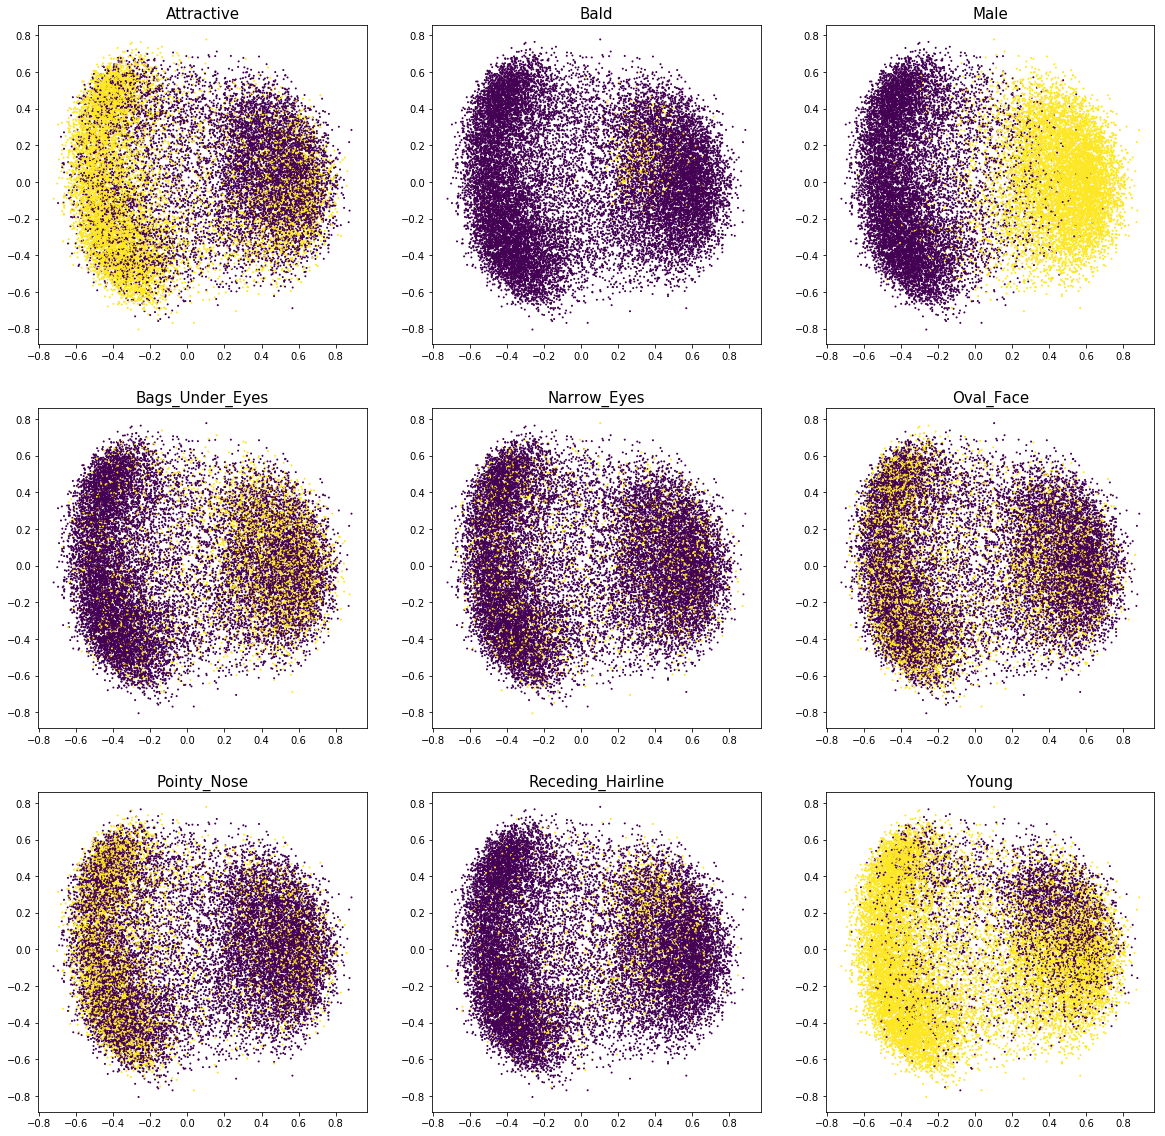

In [8]:
plt.figure(figsize=(20,20))

for k in range(len(atts)):
    plt.subplot(3,3,k+1)
    # skip every 10 points (200k points are too much for matplotlib)
    plt.scatter(principalComponents[::10,0], principalComponents[::10,1], s=1, c=labels[::10, k])
    plt.title(atts[k], fontsize = 15)